In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
import autogen
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image
from autogen.coding import LocalCommandLineCodeExecutor

In [7]:
gpt4_turbo_config_list = [{'model': 'gpt-4-turbo', 'api_key': os.environ['OPENAI_API_KEY']}]
gpt4_turbo_llm_config = {'config_list': gpt4_turbo_config_list}

gpt4o_config_list = [{'model': 'gpt-4o', 'api_key': os.environ['OPENAI_API_KEY']}]
gpt4o_llm_config = {'config_list': gpt4o_config_list}

In [8]:
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir="group_chat"),
    },
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=gpt4_turbo_llm_config,
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""비평가. 
    명확한 근거를 제시하면서 1(나쁨)~10(좋음)의 점수를 제공하여 주어진 시각화 코드의 품질을 평가하는 데 고도로 숙련된 조력자입니다. 
    각 평가에 대해 시각화 모범 사례를 고려해야 합니다. 구체적으로 다음 차원에서 코드를 신중하게 평가할 수 있습니다.
- 버그(버그): 버그, 구문 오류 또는 오타가 있나요? 코드가 컴파일되지 않는 이유는 무엇인가요? 어떻게 수정해야 하나요? 
버그가 있는 경우 버그 점수는 반드시 5점 미만이어야 합니다.
- 데이터 변환(변환): 데이터가 시각화 유형에 맞게 적절하게 변환되었나요? 
예를 들어, 필요한 경우 데이터 집합이 적절하게 필터링, 집계 또는 그룹화되었는가? 날짜 필드를 사용하는 경우, 날짜 필드가 먼저 날짜 개체 등으로 변환되었는가?
- 목표 준수(규정 준수): 코드가 지정된 비주얼리제이션 목표를 얼마나 잘 충족합니까?
- 시각화 유형(유형): 모범 사례를 고려할 때 시각화 유형이 데이터 및 의도에 적합한가? 
인사이트를 전달하는 데 더 효과적인 시각화 유형이 있는가? 다른 시각화 유형이 더 적절하다면 점수는 반드시 5점 미만이어야 합니다.
- 데이터 인코딩(인코딩): 데이터가 시각화 유형에 맞게 적절하게 인코딩되어 있습니까?
- 미학(심미성): 시각화의 미학이 시각화 유형 및 데이터에 적합한가?

위의 각 차원에 대해 점수를 제공해야 합니다.
{bugs: 0, 변환: 0, 규정 준수: 0, type: 0, encoding: 0, 미학: 0}
코드를 제안하지 마세요.
마지막으로 위의 비평을 바탕으로 코더가 코드를 개선하기 위해 취해야 할 구체적인 조치 목록을 제안하세요.
""",
    llm_config=gpt4o_llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=gpt4o_llm_config)

[autogen.oai.client: 11-13 06:01:19] {184} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 11-13 06:01:19] {184} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.
[autogen.oai.client: 11-13 06:01:19] {184} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [13]:
user_proxy.initiate_chat(
    manager,
    message="""다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, 
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. 
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    """,
)
# type exit to terminate the chat

User_proxy (to chat_manager):

다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, 
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. 
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    

--------------------------------------------------------------------------------
[autogen.oai.client: 11-13 06:03:31] {184} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.

Next speaker: Coder

Coder (to chat_manager):

먼저, 지정된 URL로부터 데이터를 다운로드하고, 데이터셋의 열을 출력하는 Python 코드를 제공하겠습니다. 이를 통해 데이터셋에 대한 이해를 돕고, 이후에 필요한 `age`와 `pclass` 변수 간의 관계를 분석하여 차트로 나타낼 것입니다.

```python
# filename: download_and_show_columns.py
import pandas as pd

# 데이터셋 URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"

# 데이터셋 다운로드
data = pd.read_csv(url)

# 데이터셋의 열(column) 출력
print(data.columns.tolist())
```

위의 코드를 다운로드 받아 실행해 주세요. 코드는 URL에서 데이터를 pandas DataFrame으로 가져온 다음, 이 데이터셋에서 사용 가능한 열을 출력할 것입니다.

---------

ChatResult(chat_id=None, chat_history=[{'content': '다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, \n    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. \n    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.\n    ', 'role': 'assistant', 'name': 'User_proxy'}, {'content': '먼저, 지정된 URL로부터 데이터를 다운로드하고, 데이터셋의 열을 출력하는 Python 코드를 제공하겠습니다. 이를 통해 데이터셋에 대한 이해를 돕고, 이후에 필요한 `age`와 `pclass` 변수 간의 관계를 분석하여 차트로 나타낼 것입니다.\n\n```python\n# filename: download_and_show_columns.py\nimport pandas as pd\n\n# 데이터셋 URL\nurl = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"\n\n# 데이터셋 다운로드\ndata = pd.read_csv(url)\n\n# 데이터셋의 열(column) 출력\nprint(data.columns.tolist())\n```\n\n위의 코드를 다운로드 받아 실행해 주세요. 코드는 URL에서 데이터를 pandas DataFrame으로 가져온 다음, 이 데이터셋에서 사용 가능한 열을 출력할 것입니다.', 'name': 'Coder', 'role': 'user'}, {'content': "exitcode: 0 (execution succeeded)\nCode output: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'a

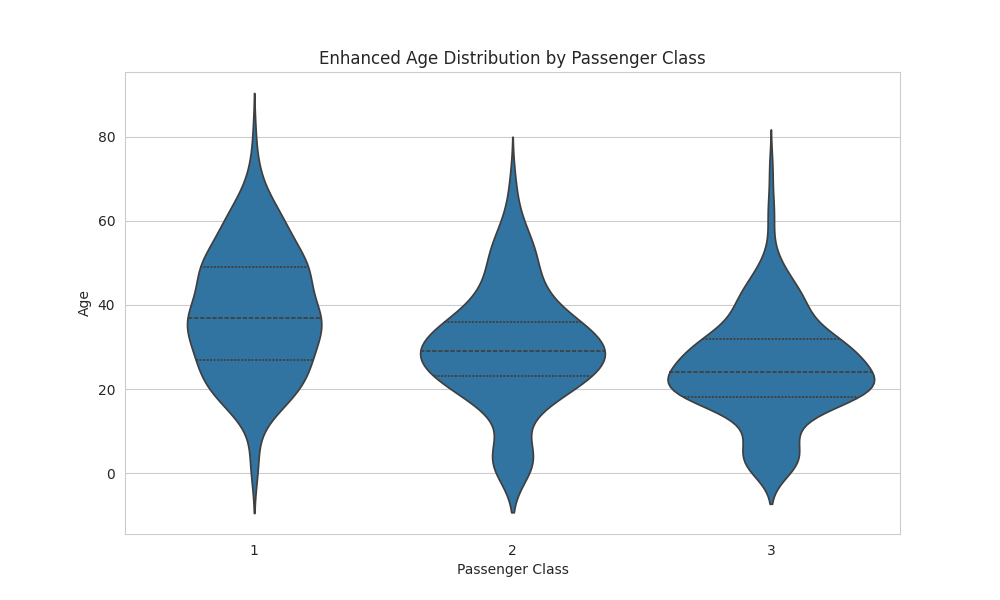

In [14]:
Image(filename="group_chat/enhanced_age_pclass_relationship.png")